# **Adv AI - Airbnb Analysis**
This file contains EDA and Forecasting for the Airbnb Dataset.

# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
#Mapping each quarter label to its CSV file name
files = {
    "2022Q4": "listings_q4.csv",  # Oct–Dec 2022
    "2023Q1": "listings_q1.csv",  # Jan–Mar 2023
    "2023Q2": "listings_q2.csv",  # Apr–Jun 2023
    "2023Q3": "listings_q3.csv",  # Jul–Sep 2023
}

#A "start date" for each quarter (for plotting on a timeline)
period_start_map = {
    "2022Q4": "2022-10-01",
    "2023Q1": "2023-01-01",
    "2023Q2": "2023-04-01",
    "2023Q3": "2023-07-01",
}


In [ ]:
dfs = []

for period, path in files.items():
    df = pd.read_csv(path)
    df["period"] = period
    df["period_start"] = pd.to_datetime(period_start_map[period])
    dfs.append(df)

listings_all = pd.concat(dfs, ignore_index=True)

print(listings_all[["period", "period_start"]].head())
print(listings_all.shape)


   period period_start
0  2022Q4   2022-10-01
1  2022Q4   2022-10-01
2  2022Q4   2022-10-01
3  2022Q4   2022-10-01
4  2022Q4   2022-10-01
(171947, 20)


In [ ]:
listings_all

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,period,period_start
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.983010,-118.386070,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN,2022Q4,2022-10-01
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.096250,-118.346050,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN,2022Q4,2022-10-01
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.004400,-118.480950,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN,2022Q4,2022-10-01
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.024380,-118.383740,Private room,300,60,0,NaN,NaN,2,365,0,NaN,2022Q4,2022-10-01
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.104200,-118.347480,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN,2022Q4,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171942,674665451875208878,Loft in Los Angeles · 1 bedroom · 1 bed · 1 bath,60414638,Matan,City of Los Angeles,Downtown,34.054440,-118.252510,Entire home/apt,168,30,0,NaN,NaN,1,100,0,NaN,2023Q3,2023-07-01
171943,924549795854323880,Serviced apartment in Los Angeles · ★New · 1 b...,30850484,Level Hotel And Furnished Suites,City of Los Angeles,Downtown,34.043875,-118.257833,Entire home/apt,197,30,0,NaN,NaN,91,337,0,NaN,2023Q3,2023-07-01
171944,931710049284391686,Home in Universal City · ★New · 7 bedrooms · 7...,213524883,Cubier,Unincorporated Areas,Universal City,34.133923,-118.349302,Entire home/apt,646,3,0,NaN,NaN,35,40,0,NaN,2023Q3,2023-07-01
171945,953083364153243931,Home in Los Angeles · ★New · 4 bedrooms · 5 be...,14642936,Stefan,City of Los Angeles,Beverly Grove,34.070601,-118.373199,Entire home/apt,783,2,1,2023-08-19,1.00,1,266,1,HSR23-000136,2023Q3,2023-07-01


In [ ]:
def clean_price(x):
    """To convert strings like '$1,234.00' to float 1234.0"""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float)):
        return float(x)
    x = str(x)
    x = x.replace("$", "").replace(",", "").strip()
    return pd.to_numeric(x, errors="coerce")

#Applying cleaner
listings_all["price_clean"] = listings_all["price"].apply(clean_price)

#Drop rows with missing or invalid price
listings_all = listings_all[listings_all["price_clean"].notna()]

#Remove extreme outliers, e.g. over $1500/night
listings_all = listings_all[
    (listings_all["price_clean"] > 0) & (listings_all["price_clean"] < 1500)
]

listings_all["price_clean"].describe()


,price_clean
count,168063.000000
mean,204.316649
std,204.354078
min,7.000000
25%,89.000000
50%,142.000000
75%,235.000000
max,1499.000000


**Missingness report**

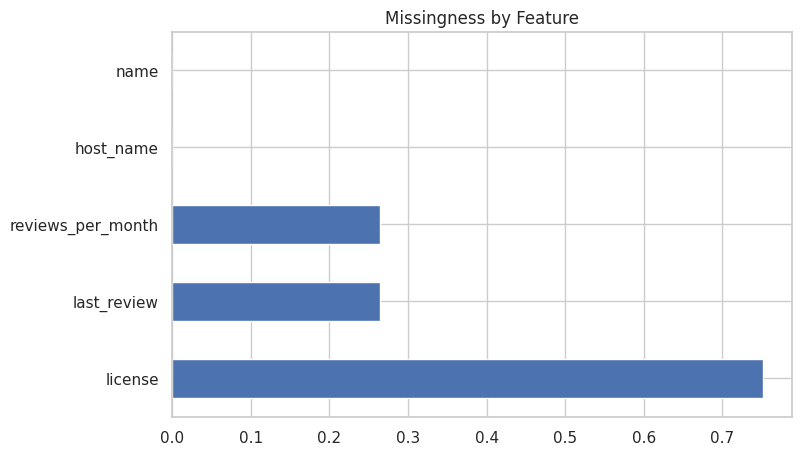

,0
license,0.751343
last_review,0.264002
reviews_per_month,0.264002
host_name,0.000048
name,0.000024


In [ ]:
missing = listings_all.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(8,5))
missing.plot(kind="barh")
plt.title("Missingness by Feature")
plt.show()

missing


**Price distribution**

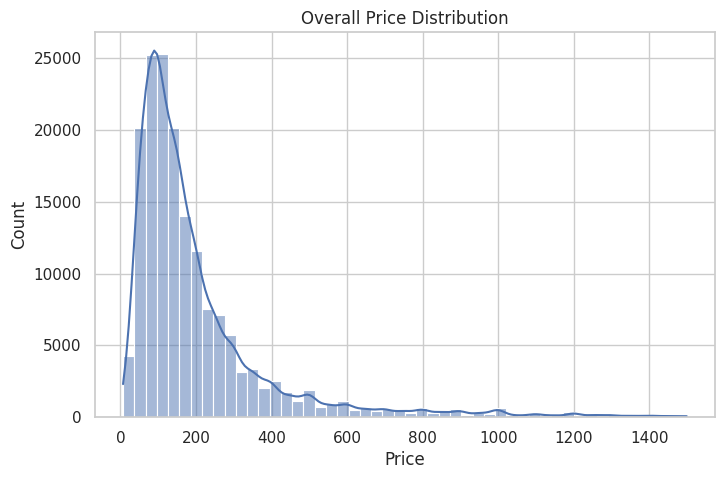

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(listings_all["price_clean"], bins=50, kde=True)
plt.title("Overall Price Distribution")
plt.xlabel("Price")
plt.show()


**Boxplot by quarter**

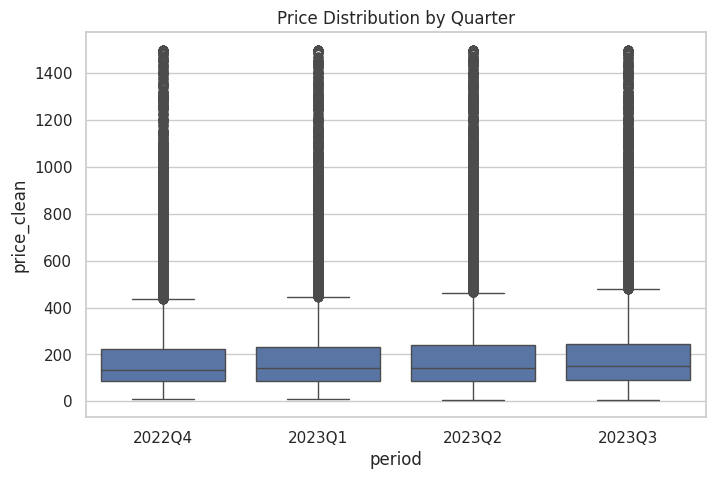

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=listings_all, x="period", y="price_clean")
plt.title("Price Distribution by Quarter")
plt.show()


**Price by room type**

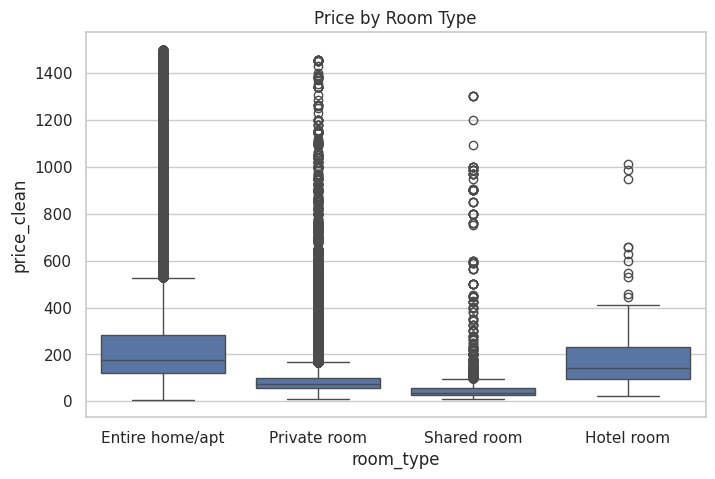

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,118153.0,248.443967,217.992317,7.0,121.0,175.0,284.00,1499.0
Hotel room,262.0,175.778626,143.369271,22.0,94.0,140.5,230.75,1013.0
Private room,46673.0,101.445740,110.325001,10.0,55.0,75.0,100.00,1455.0
Shared room,2975.0,68.180840,130.873120,10.0,27.0,35.0,55.00,1300.0


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=listings_all, x="room_type", y="price_clean")
plt.title("Price by Room Type")
plt.show()

listings_all.groupby("room_type")["price_clean"].describe()

**Price by neighbourhood (top 15)**

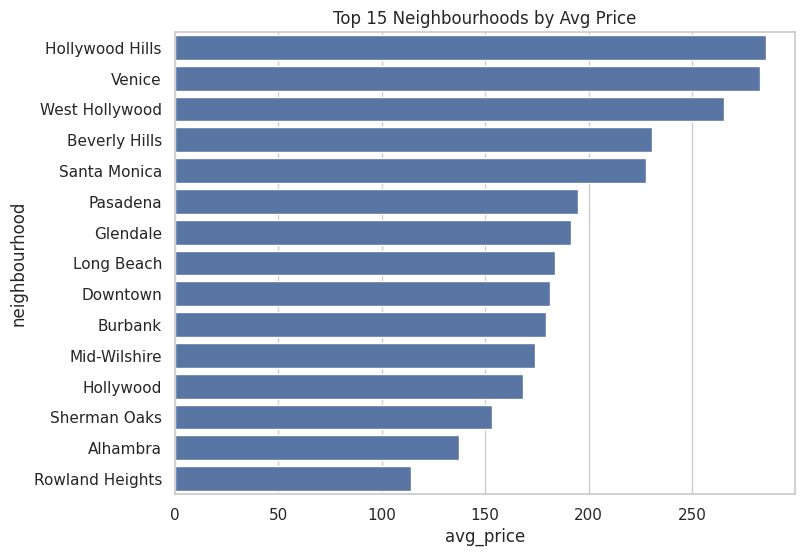

In [ ]:
top_neigh = (
    listings_all.groupby("neighbourhood")
        .agg(avg_price=("price_clean", "mean"), count=("id", "count"))
        .sort_values("count", ascending=False)
        .head(15)
        .sort_values("avg_price", ascending=False)   # <-- sort for plotting
        .reset_index()
)

plt.figure(figsize=(8,6))
sns.barplot(data=top_neigh, x="avg_price", y="neighbourhood")
plt.title("Top 15 Neighbourhoods by Avg Price")
plt.show()


**Outlier detection**

In [ ]:
q1 = listings_all["price_clean"].quantile(0.25)
q3 = listings_all["price_clean"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = listings_all[(listings_all["price_clean"] < lower) | (listings_all["price_clean"] > upper)]
print("Outliers:", outliers.shape)

df_no_outliers = listings_all[(listings_all["price_clean"] >= lower) & (listings_all["price_clean"] <= upper)]

Outliers: (14242, 21)


**Correlation heatmap (numeric features)**

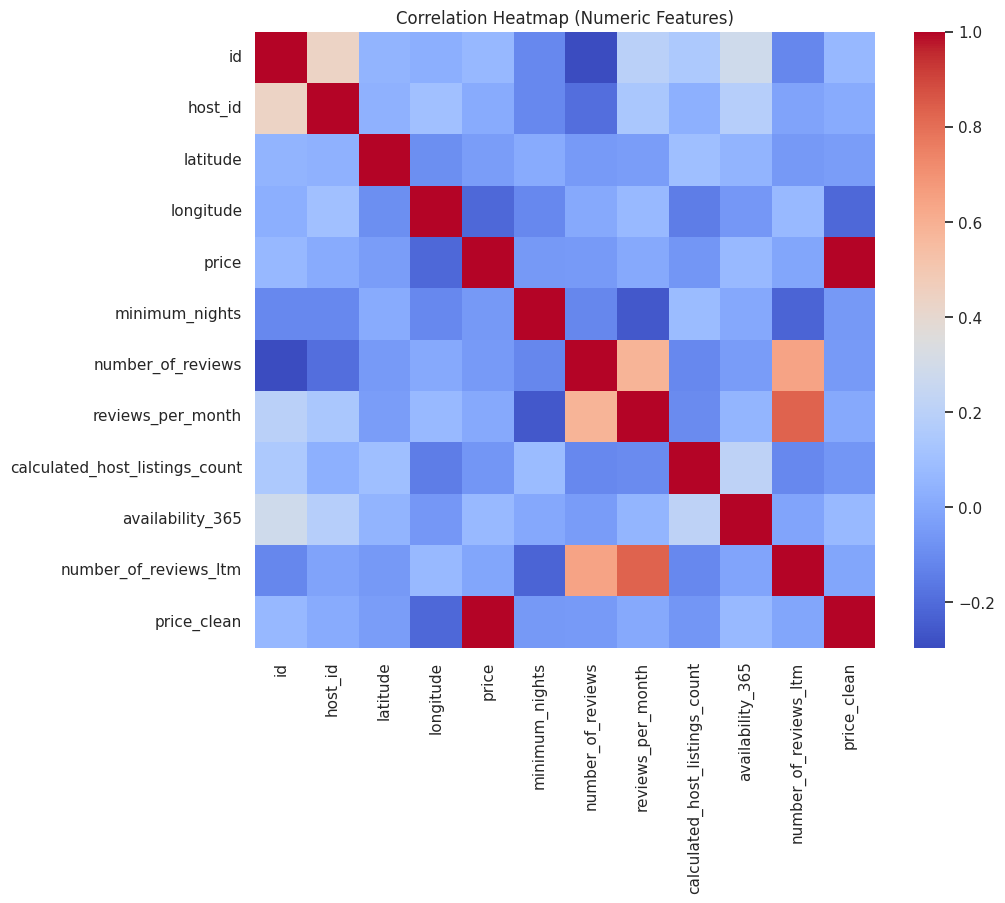

In [ ]:
numeric = listings_all.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**Reviews activity**

In [ ]:
listings_all["last_review"] = pd.to_datetime(listings_all["last_review"], errors="coerce")

review_counts = (
    listings_all.groupby(listings_all["last_review"].dt.year)
          .size()
          .reset_index(name="num_reviews")
)
review_counts

,last_review,num_reviews
0,2011.0,4
1,2012.0,10
2,2013.0,25
3,2014.0,179
4,2015.0,875
5,2016.0,1685
6,2017.0,2022
7,2018.0,3262
8,2019.0,6316
9,2020.0,5983


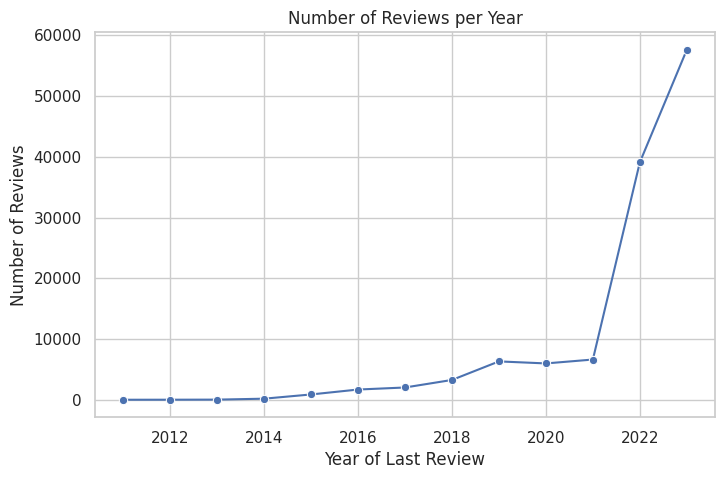

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=review_counts, x="last_review", y="num_reviews", marker="o")
plt.title("Number of Reviews per Year")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.show()

**Plot reviews by year**

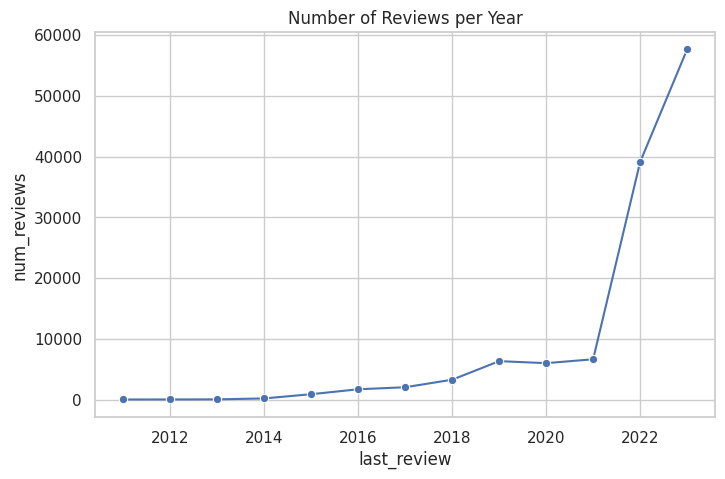

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=review_counts, x="last_review", y="num_reviews", marker="o")
plt.title("Number of Reviews per Year")
plt.show()

**Price vs reviews**

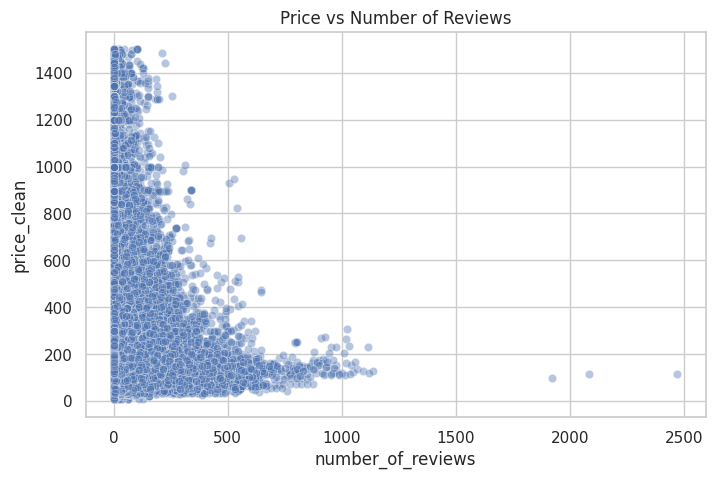

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=listings_all, x="number_of_reviews", y="price_clean", alpha=0.4)
plt.title("Price vs Number of Reviews")
plt.show()

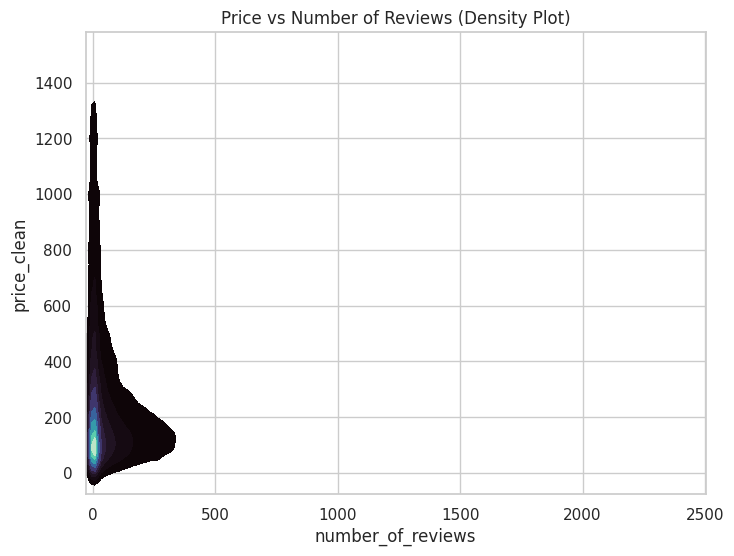

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=listings_all,
    x="number_of_reviews",
    y="price_clean",
    fill=True,
    cmap="mako",
    thresh=0.05
)
plt.title("Price vs Number of Reviews (Density Plot)")
plt.show()


**Availability analysis**

In [ ]:

avail_cols = [c for c in listings_all.columns if "availability" in c]

listings_all[avail_cols].describe()


,availability_365
count,168063.000000
mean,196.946312
std,139.981087
min,0.000000
25%,64.000000
50%,195.000000
75%,343.000000
max,365.000000


**Plot availability vs price**


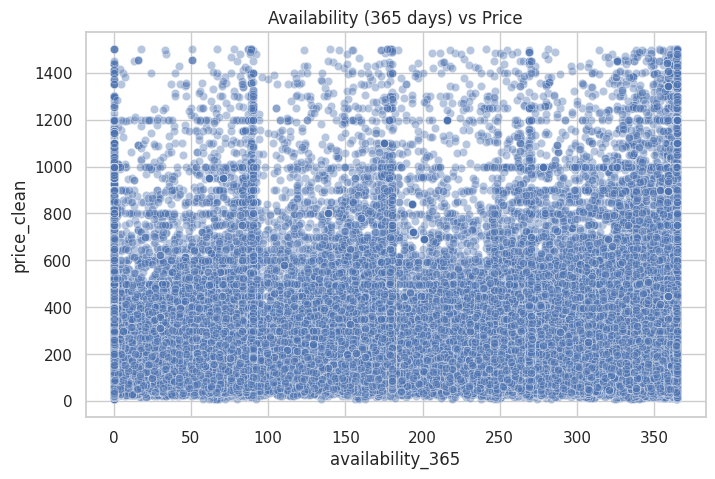

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=listings_all, x="availability_365", y="price_clean", alpha=0.4)
plt.title("Availability (365 days) vs Price")
plt.show()

In [ ]:
summary = pd.DataFrame({
    "mean_price": [listings_all["price_clean"].mean()],
    "median_price": [listings_all["price_clean"].median()],
    "num_listings": [len(listings_all)],
    "num_neighbourhoods": [listings_all["neighbourhood"].nunique() if "neighbourhood" in listings_all.columns else None],
    "num_hosts": [listings_all["host_id"].nunique() if "host_id" in listings_all.columns else None],
})

summary


,mean_price,median_price,num_listings,num_neighbourhoods,num_hosts
0,204.316649,142.0,168063,266,26341


# **Forecasting**

In [ ]:
quarterly_price = (
    listings_all
    .groupby(["period", "period_start"])
    .agg(
        mean_price=("price_clean", "mean"),
        median_price=("price_clean", "median"),
        listing_count=("price_clean", "size")
    )
    .reset_index()
    .sort_values("period_start")
)

quarterly_price


,period,period_start,mean_price,median_price,listing_count
0,2022Q4,2022-10-01,196.317700,135.0,39531
1,2023Q1,2023-01-01,201.325546,141.0,41475
2,2023Q2,2023-04-01,205.862948,144.0,43480
3,2023Q3,2023-07-01,212.876885,149.0,43577


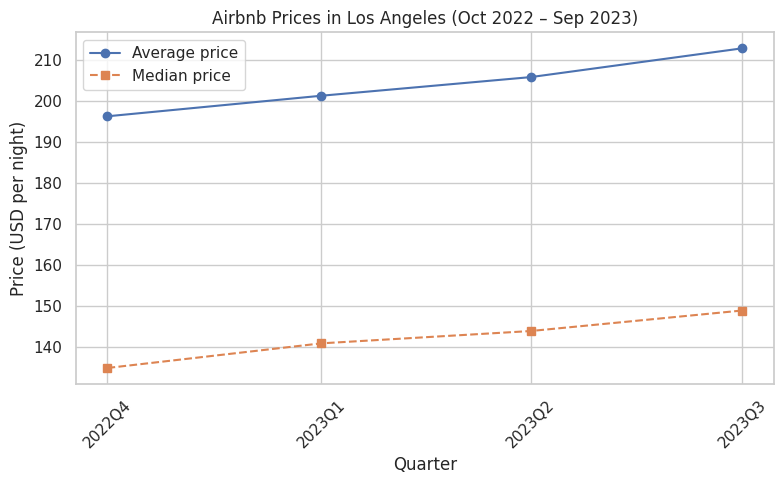

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(
    quarterly_price["period_start"],
    quarterly_price["mean_price"],
    marker="o",
    label="Average price"
)

plt.plot(
    quarterly_price["period_start"],
    quarterly_price["median_price"],
    marker="s",
    linestyle="--",
    label="Median price"
)

plt.xlabel("Quarter")
plt.ylabel("Price (USD per night)")
plt.title("Airbnb Prices in Los Angeles (Oct 2022 – Sep 2023)")
plt.xticks(quarterly_price["period_start"], quarterly_price["period"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Aggregating by quarter + room type
qt_room = (
    listings_all
    .groupby(["period", "period_start", "room_type"])
    .agg(mean_price=("price_clean", "mean"))
    .reset_index()
    .sort_values(["room_type", "period_start"])
)

qt_room.head()


,period,period_start,room_type,mean_price
0,2022Q4,2022-10-01,Entire home/apt,240.104816
4,2023Q1,2023-01-01,Entire home/apt,247.396580
8,2023Q2,2023-04-01,Entire home/apt,253.072899
12,2023Q3,2023-07-01,Entire home/apt,252.202906
1,2022Q4,2022-10-01,Hotel room,148.439394


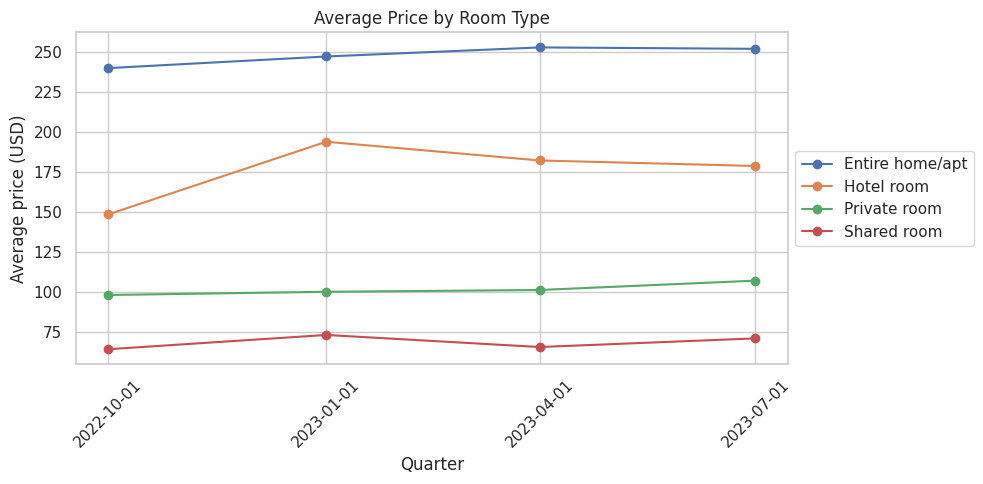

In [ ]:
plt.figure(figsize=(10, 5))

for room_type, group in qt_room.groupby("room_type"):
    plt.plot(
        group["period_start"],
        group["mean_price"],
        marker="o",
        label=room_type
    )

plt.xlabel("Quarter")
plt.ylabel("Average price (USD)")
plt.title("Average Price by Room Type")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.xticks(group["period_start"].unique(), rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Using an index t = 0,1,2,3 for our 4 quarters
quarterly_price = quarterly_price.sort_values("period_start").reset_index(drop=True)
quarterly_price["t"] = np.arange(len(quarterly_price))  # 0..3

#Fitting in a linear trend: mean_price ≈ a * t + b
coeffs = np.polyfit(quarterly_price["t"], quarterly_price["mean_price"], deg=1)
a, b = coeffs  # slope and intercept

print("Slope (price change per quarter):", a)
print("Intercept:", b)


Slope (price change per quarter): 5.421495665931476
Intercept: 195.9635261559462


In [ ]:
#Future time steps t = 4,5,6,7
t_future = np.arange(len(quarterly_price), len(quarterly_price) + 4)

future_periods = ["2023Q4", "2024Q1", "2024Q2", "2024Q3"]
future_start_dates = pd.to_datetime(["2023-10-01", "2024-01-01", "2024-04-01", "2024-07-01"])

mean_forecast = a * t_future + b

forecast_df = pd.DataFrame({
    "period": future_periods,
    "period_start": future_start_dates,
    "t": t_future,
    "mean_price_forecast": mean_forecast
})

forecast_df


,period,period_start,t,mean_price_forecast
0,2023Q4,2023-10-01,4,217.649509
1,2024Q1,2024-01-01,5,223.071004
2,2024Q2,2024-04-01,6,228.492500
3,2024Q3,2024-07-01,7,233.913996


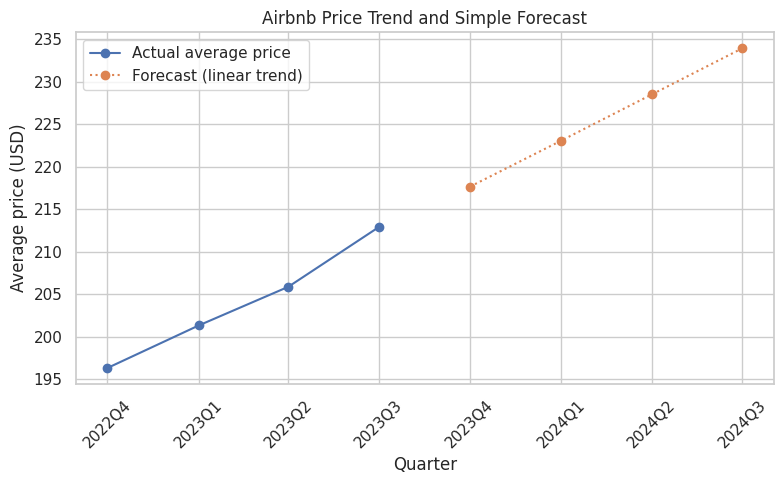

In [ ]:
plt.figure(figsize=(8, 5))

#Actual
plt.plot(
    quarterly_price["period_start"],
    quarterly_price["mean_price"],
    marker="o",
    label="Actual average price"
)

#Forecast (dotted line)
plt.plot(
    forecast_df["period_start"],
    forecast_df["mean_price_forecast"],
    marker="o",
    linestyle=":",
    label="Forecast (linear trend)"
)

#Combine x-ticks
all_dates = pd.concat([quarterly_price["period_start"], forecast_df["period_start"]])
all_labels = list(quarterly_price["period"]) + list(forecast_df["period"])

plt.xlabel("Quarter")
plt.ylabel("Average price (USD)")
plt.title("Airbnb Price Trend and Simple Forecast")
plt.xticks(all_dates, all_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#YoY change from 2022Q4 to 2023Q3
base = quarterly_price.loc[quarterly_price["period"] == "2022Q4", "mean_price"].iloc[0]
last = quarterly_price.loc[quarterly_price["period"] == "2023Q3", "mean_price"].iloc[0]
change_abs = last - base
change_pct = (change_abs / base) * 100

print(f"Average price change from 2022Q4 to 2023Q3: ${change_abs:.2f} ({change_pct:.1f}%)")

#Expected average price in 2024Q3 (last forecast point)
forecast_2024Q3 = forecast_df.loc[forecast_df["period"] == "2024Q3", "mean_price_forecast"].iloc[0]
print(f"Forecasted average price in 2024Q3: ${forecast_2024Q3:.2f}")


Average price change from 2022Q4 to 2023Q3: $16.56 (8.4%)
Forecasted average price in 2024Q3: $233.91


# **ARIMA Forecasting**

In [ ]:
#To Expand quarterly price into monthly values
monthly_df = []

for _, row in quarterly_price.iterrows():
    start = row["period_start"]
    end = start + pd.offsets.QuarterEnd()

    #Creating 3 months for each quarter
    months = pd.date_range(start=start, end=end, freq="MS")
    for m in months:
        monthly_df.append({
            "date": m,
            "price": row["mean_price"]
        })

monthly_df = pd.DataFrame(monthly_df).set_index("date")
monthly_df


,price
date,
2022-10-01,196.317700
2022-11-01,196.317700
2022-12-01,196.317700
2023-01-01,201.325546
2023-02-01,201.325546
2023-03-01,201.325546
2023-04-01,205.862948
2023-05-01,205.862948
2023-06-01,205.862948


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_df["price"], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -27.458
Date:                Mon, 01 Dec 2025   AIC                             60.916
Time:                        18:40:54   BIC                             62.110
Sample:                    10-01-2022   HQIC                            60.164
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        9.58e-05   1.89e+06   5.07e-11      1.000   -3.71e+06    3.71e+06
ma.L1      -9.576e-05   1.89e+06  -5.07e-11      1.000   -3.71e+06    3.71e+06
sigma2         8.6238      4.838      1.783      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_steps = 12  # 1 year forecast
forecast = model_fit.forecast(steps=forecast_steps)

forecast


,predicted_mean
2023-10-01,212.876885
2023-11-01,212.876885
2023-12-01,212.876885
2024-01-01,212.876885
2024-02-01,212.876885
2024-03-01,212.876885
2024-04-01,212.876885
2024-05-01,212.876885
2024-06-01,212.876885
2024-07-01,212.876885


In [ ]:
future_dates = pd.date_range(start=monthly_df.index[-1] + pd.offsets.MonthBegin(1),
                             periods=forecast_steps, freq='MS')

forecast_df = pd.DataFrame({
    "date": future_dates,
    "forecast_price": forecast.values
}).set_index("date")

forecast_df


,forecast_price
date,
2023-10-01,212.876885
2023-11-01,212.876885
2023-12-01,212.876885
2024-01-01,212.876885
2024-02-01,212.876885
2024-03-01,212.876885
2024-04-01,212.876885
2024-05-01,212.876885
2024-06-01,212.876885


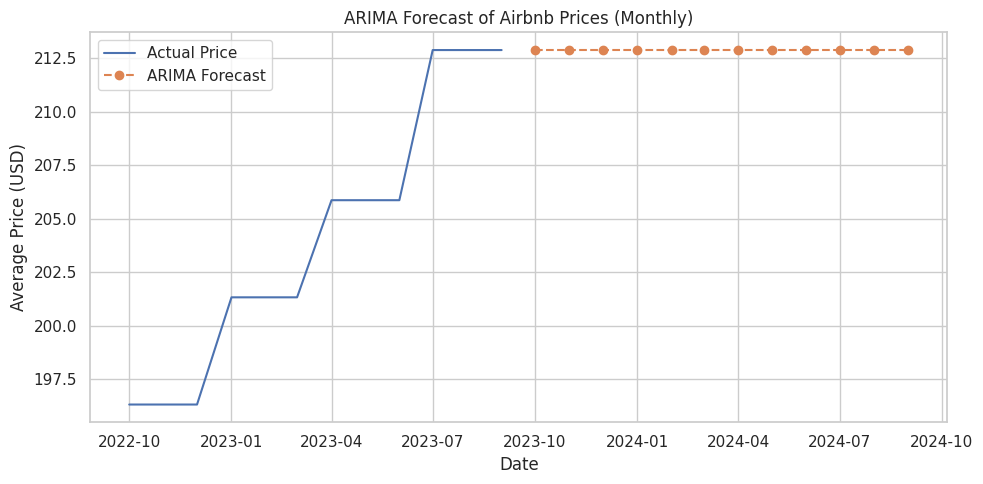

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_df.index, monthly_df["price"], label="Actual Price")
plt.plot(forecast_df.index, forecast_df["forecast_price"],
         label="ARIMA Forecast", linestyle="--", marker="o")

plt.title("ARIMA Forecast of Airbnb Prices (Monthly)")
plt.xlabel("Date")
plt.ylabel("Average Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


# **SARIMA Forecasting**

In [ ]:
#quarterly_price has columns: period, period_start, mean_price
monthly_df = []

for _, row in quarterly_price.iterrows():
    start = row["period_start"]
    end = start + pd.offsets.QuarterEnd()

    #3 months inside each quarter
    months = pd.date_range(start=start, end=end, freq="MS")
    for m in months:
        monthly_df.append({"date": m, "price": row["mean_price"]})

monthly_df = pd.DataFrame(monthly_df).set_index("date")
monthly_df


,price
date,
2022-10-01,196.317700
2022-11-01,196.317700
2022-12-01,196.317700
2023-01-01,201.325546
2023-02-01,201.325546
2023-03-01,201.325546
2023-04-01,205.862948
2023-05-01,205.862948
2023-06-01,205.862948


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Defining and fitting the SARIMA model
sarima_model = SARIMAX(
    monthly_df["price"],
    order=(1, 1, 0),             # non-seasonal (p,d,q)
    seasonal_order=(0, 0, 1, 3), # seasonal (P,D,Q,s) with s=3 months
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit(disp=False)

print(sarima_fit.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               price   No. Observations:                   12
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 3)   Log Likelihood                 -16.019
Date:                             Mon, 01 Dec 2025   AIC                             38.039
Time:                                     19:39:34   BIC                             37.877
Sample:                                 10-01-2022   HQIC                            36.033
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -4.986e-06   3.76e+04  -1.33e-10      1.000   -7.37e+04    7.37e+04
ma.S.L3        1.0000   1.7

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_steps = 12  # forecast 1 year ahead

sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()  # confidence intervals

#Building the date index for forecast
future_dates = pd.date_range(
    start=monthly_df.index[-1] + pd.offsets.MonthBegin(1),
    periods=forecast_steps,
    freq="MS"
)

sarima_mean.index = future_dates
sarima_ci.index = future_dates


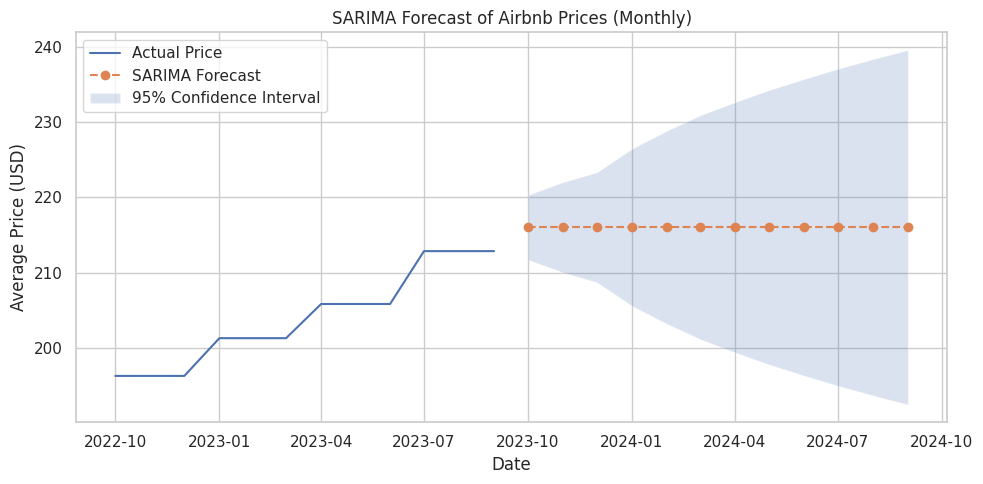

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

#Actual history
plt.plot(monthly_df.index, monthly_df["price"], label="Actual Price")

#Forecast line
plt.plot(sarima_mean.index, sarima_mean.values,
         label="SARIMA Forecast", linestyle="--", marker="o")

#Confidence interval shading
plt.fill_between(
    sarima_ci.index,
    sarima_ci.iloc[:, 0],
    sarima_ci.iloc[:, 1],
    alpha=0.2,
    label="95% Confidence Interval"
)

plt.title("SARIMA Forecast of Airbnb Prices (Monthly)")
plt.xlabel("Date")
plt.ylabel("Average Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()
